Healthcare Related Artifical Dataset from Kaggle: Link: ___


1. EXPLORATORY STAGE:
- Import necessary modules
- Import dataset
- Explore dataset using head, describe, shape, info commands
- Note any issues for cleaning later


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Import data and perform some basic commands to get some information.

In [30]:
df = r'C:\Users\user\Desktop\Meteorite Landings Project\healthcare_proj\healthcare_dataset.csv'
df = pd.read_csv(df)

print(df.head)
print(df.dtypes)
print(df.shape)
print(df.columns.values.tolist())

<bound method NDFrame.head of                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith             

Can see some issues straight away:
- Formatting issue in 'Name' values
- Too many decimal places shown in 'Billing Amount' values
- 'Admission' and 'Discharge' dates are object datatypes instead of datetime

Get more information on values for each variable

In [31]:
print(df['Gender'].unique())                    
print(df['Blood Type'].unique())                
print(df['Medical Condition'].unique())         
print(df['Doctor'].unique())                    
print(df['Hospital'].unique())                  
print(df['Insurance Provider'].unique())        
print(df['Admission Type'].unique())            
print(df['Medication'].unique())                
print(df['Test Results'].unique())              

print(df['Hospital'].nunique())                
print(df['Doctor'].nunique())  

['Male' 'Female']
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']
['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
['Urgent' 'Emergency' 'Elective']
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
['Normal' 'Inconclusive' 'Abnormal']
39876
40341


No obvious errors seen,
Lots of different hospitals and doctors: 39876 and 40341 respectively.

2. CLEANING AND ANALYSIS PREP STAGE
Things to correct:
- Formatting in 'Name' values
- Data type for 'Admission' and 'Discharge' values
- 'Billing Amount' decimal places
- Check for duplicates and null values and remove where necessary

In [32]:
df['Name'] = df['Name'].str.title() 

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%Y-%m-%d')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%Y-%m-%d')

print(df.dtypes)

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object


In [33]:
df['Billing Amount'] = df['Billing Amount'].round(2)
print(df['Billing Amount'])

0        18856.28
1        33643.33
2        27955.10
3        37909.78
4        14238.32
           ...   
55495     2650.71
55496    31457.80
55497    27620.76
55498    32451.09
55499     4010.13
Name: Billing Amount, Length: 55500, dtype: float64


In [34]:
print(f'No. of duplicates: {df.duplicated().sum()}')

print(f'Any nulls?: {df.isnull().values.any()}') 

No. of duplicates: 534
Any nulls?: False


- 534 duplicate rows out of 55500 (0.96%)
- No null values in whole dataset (!)

In [35]:
df_dedup = df.drop_duplicates()
print(df_dedup.sum)
df = df_dedup


<bound method DataFrame.sum of                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby Jackson   30    Male         B-            Cancer   
1           Leslie Terry   62    Male         A+           Obesity   
2            Danny Smith   76  Female         A-           Obesity   
3           Andrew Watts   28  Female         O+          Diabetes   
4          Adrienne Bell   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  Elizabeth Jackson   42  Female         O+            Asthma   
55496         Kyle Perez   61  Female        AB-           Obesity   
55497       Heather Wang   38  Female         B+      Hypertension   
55498     Jennifer Jones   43    Male         O-         Arthritis   
55499       James Garcia   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith            

Can see duplicate rows have been removed. 54966 rows remaining.

- Change variable names of 'Date of Admission' to be consistent with 'Discharge Date'
- Also change 'Billing Amount' to 'Billing Amount (£)' to add context

In [36]:
df.rename(columns={'Date of Admission': 'Admission Date'}, inplace=True)
df.rename(columns={'Billing Amount': 'Billing Amount (£)'}, inplace=True)
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Admission Date', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount (£)', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


Create new variable finding time in hospital (time between discharge and admission)

In [37]:
df['Time Taken to be Discharged'] = df['Discharge Date'] - df['Admission Date']

Cleaning and Analysis Prep Stage complete.

3. ANALYSIS STAGE
- Perform some statistical analysis: averages, min, max, std deviation etc.
- Find distribution of variables: Gender, Age, Blood Type
- Create some plots to explore relationships between variables


In [38]:
print(df['Age'].agg(['min','max', 'mean', 'std']))
print(df['Billing Amount (£)'].agg(['min','max', 'mean', 'std'])) 

min     13.000000
max     89.000000
mean    51.535185
std     19.605661
Name: Age, dtype: float64
min     -2008.490000
max     52764.280000
mean    25544.306260
std     14208.409715
Name: Billing Amount (£), dtype: float64


See there are negative values for Billing Amount - doesn't seem correct so will explore further

In [39]:
neg_billing = df[df['Billing Amount (£)'] < 0]
print(neg_billing)
zero_billing = df[df['Billing Amount (£)'] == 0]  
print(zero_billing)



                           Name  Age  Gender Blood Type Medical Condition  \
132             Ashley Erickson   32  Female        AB-            Cancer   
799           Christopher Weiss   49  Female        AB-            Asthma   
1018              Ashley Warner   60    Male         A+      Hypertension   
1421               Jay Galloway   74  Female         O+            Asthma   
2103          Joshua Williamson   72  Female         B-          Diabetes   
...                         ...  ...     ...        ...               ...   
52213  Mr. Christopher Alvarado   74    Male        AB+           Obesity   
52629          Gabrielle Decker   66    Male        AB-         Arthritis   
53204             Ashley Warner   55    Male         A+      Hypertension   
53232              Daniel Drake   68  Female         B+      Hypertension   
54136         Dr. Michael Mckay   64    Male         O+            Cancer   

      Admission Date               Doctor                   Hospital  \
132

106 rows with negative Billing Amount values --> remove:

In [40]:
df = df[df['Billing Amount (£)'] >= 0]

Find some statistical information of all numerical variables:

In [41]:
print(df['Age'].agg(['min','max', 'mean', 'std']))
print(df['Billing Amount (£)'].agg(['min','max', 'mean', 'std'])) 
print(df['Time Taken to be Discharged'].agg(['min','max', 'mean', 'std']))
print(df['Room Number'].agg(['min','max', 'mean', 'std']))

min     13.000000
max     89.000000
mean    51.533850
std     19.605295
Name: Age, dtype: float64
min         9.240000
max     52764.280000
mean    25594.633612
std     14175.867046
Name: Billing Amount (£), dtype: float64
min               1 days 00:00:00
max              30 days 00:00:00
mean   15 days 11:58:17.630331753
std     8 days 15:52:21.230009691
Name: Time Taken to be Discharged, dtype: timedelta64[ns]
min     101.000000
max     500.000000
mean    301.109752
std     115.217195
Name: Room Number, dtype: float64


- Min age: 13, Max age: 89,      Average: 51
- Time taken to be discharged - between 1 and 30 days,   Average: 15
- Billing Amount - between £9.24 and £52,764.28,     Average : £26,000 approx
- Room numbers from 101 to 500

All numerical values have averages near to middle of ranges --> evenly distributed

Want to explore if different variables affect Billing Amount


In [42]:
print('AVERAGE BILLING AMOUNT BY MEDICAL CONDITION')
condition_dfs = {}

for condition in df['Medical Condition'].unique():
    condition_df = df[df['Medical Condition'] == condition]
    condition_dfs[condition] = condition_df

avg_billings = {}

for condition, condition_df in condition_dfs.items():
    avg_billing = condition_df['Billing Amount (£)'].mean()
    avg_billings[condition] = avg_billing

for condition, avg_amount in avg_billings.items():
    print(f"Avg Billing Amount for '{condition}': £{avg_amount:.2f}")

AVERAGE BILLING AMOUNT BY MEDICAL CONDITION
Avg Billing Amount for 'Cancer': £25205.92
Avg Billing Amount for 'Obesity': £25859.22
Avg Billing Amount for 'Diabetes': £25714.33
Avg Billing Amount for 'Asthma': £25685.38
Avg Billing Amount for 'Hypertension': £25559.84
Avg Billing Amount for 'Arthritis': £25542.90


Medical condition does not have a huge effect on Billing Amount.

In [43]:
print('AVERAGE BILLING AMOUNT BY INSURANCE PROVIDER')
provider_dfs = {}
for provider in df['Insurance Provider'].unique():
    provider_df = df[df['Insurance Provider'] == provider]
    provider_dfs[provider] = provider_df

avg_prov_billings = {}
for provider, provider_df in provider_dfs.items():
    avg_prov_billing = provider_df['Billing Amount (£)'].mean()
    avg_prov_billings[provider] = avg_prov_billing

for provider, avg_prov_amount in avg_prov_billings.items():
    print(f"Avg Billing Amount for '{provider}': £{avg_prov_amount:.2f}")

print('AVERAGE BILLING AMOUNT BY MEDICATION')
medication_dfs = {}
for medication in df['Medication'].unique():
    medication_df = df[df['Medication'] == medication]
    medication_dfs[medication] = medication_df

avg_med_billings = {}

for medication, medication_df in medication_dfs.items():
    avg_med_billing = medication_df['Billing Amount (£)'].mean()
    avg_med_billings[medication] = avg_med_billing

for medication, avg_med_amount in avg_med_billings.items():
    print(f"Avg Billing Amount for '{medication}': £{avg_med_amount:.2f}")   


print('AVERAGE BILLING AMOUNT BY TIME TAKEN TO BE DISCHARGED')

discharged_dfs = {}
for discharged in df['Time Taken to be Discharged'].unique():
    discharged_df = df[df['Time Taken to be Discharged'] == discharged]
    discharged_dfs[discharged] = discharged_df

avg_dis_billings = {}

for discharged, discharged_df in discharged_dfs.items():
    avg_dis_billing = discharged_df['Billing Amount (£)'].mean()
    avg_dis_billings[discharged] = avg_dis_billing

for discharged, avg_dis_amount in avg_dis_billings.items():
    print(f"Avg Billing Amount for '{discharged}': £{avg_dis_amount:.2f}")

AVERAGE BILLING AMOUNT BY INSURANCE PROVIDER
Avg Billing Amount for 'Blue Cross': £25639.27
Avg Billing Amount for 'Medicare': £25678.09
Avg Billing Amount for 'Aetna': £25615.26
Avg Billing Amount for 'UnitedHealthcare': £25458.89
Avg Billing Amount for 'Cigna': £25582.23
AVERAGE BILLING AMOUNT BY MEDICATION
Avg Billing Amount for 'Paracetamol': £25604.90
Avg Billing Amount for 'Ibuprofen': £25795.04
Avg Billing Amount for 'Aspirin': £25647.12
Avg Billing Amount for 'Penicillin': £25541.18
Avg Billing Amount for 'Lipitor': £25385.13
AVERAGE BILLING AMOUNT BY TIME TAKEN TO BE DISCHARGED
Avg Billing Amount for '2 days 00:00:00': £25346.62
Avg Billing Amount for '6 days 00:00:00': £25947.92
Avg Billing Amount for '15 days 00:00:00': £25725.85
Avg Billing Amount for '30 days 00:00:00': £25525.40
Avg Billing Amount for '20 days 00:00:00': £25943.54
Avg Billing Amount for '4 days 00:00:00': £26060.52
Avg Billing Amount for '12 days 00:00:00': £25578.73
Avg Billing Amount for '10 days 00:00:

None of the variables have a huge impact on the billing amount, not any strong corellation.

Make some plots to show distribution of data by Gender, Age and Blood Type

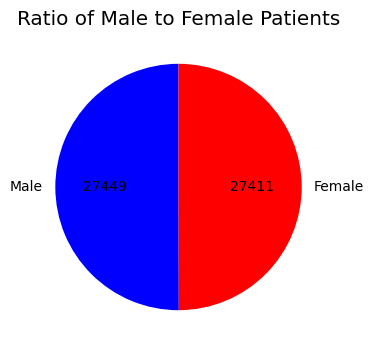

In [44]:
gender_count = df['Gender'].value_counts()
colours = ['blue', 'red']

def value(val):
    total = sum(gender_count)
    absolute = int(round(val/100 * total))
    return f"{absolute}"
    

plt.figure(figsize=(4, 4))
plt.pie(gender_count, labels=gender_count.index, colors=colours, autopct=value, startangle=90)

plt.title('Ratio of Male to Female Patients')

plt.show()


Almost completely even distribution of males and females.

Now look at Age and Blood Types

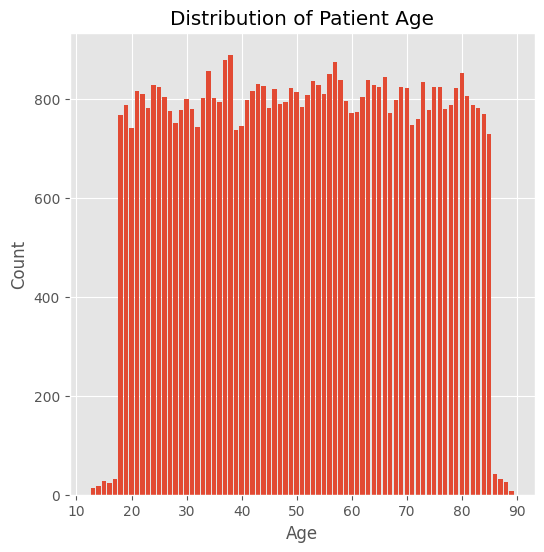

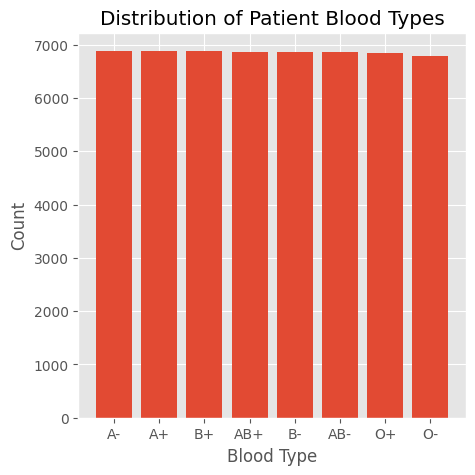

In [45]:
age_count = df['Age'].value_counts()


plt.figure(figsize=(6, 6))
plt.bar(age_count.index, age_count.values)

plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')



btype_count = df['Blood Type'].value_counts()

plt.figure(figsize=(5, 5))
plt.bar(btype_count.index, btype_count.values)

plt.title('Distribution of Patient Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Count')

plt.show()

Again, ages and blood types are fairly evenly distributed in this dataset. This would be attributed to the way the data was generated. It would be unlikely that the ages of patients would be evenly distributed and in the real world would be skewed towards older ages. Similarly, some blood types, like A+ and O+, are much more common than other types.

Will now create a correlation map visualisation to see if there are any relationships between variables at all. I predict that before completing there won't be any strong correlation between any variables, again due to the dataset being generated in a uniform way.

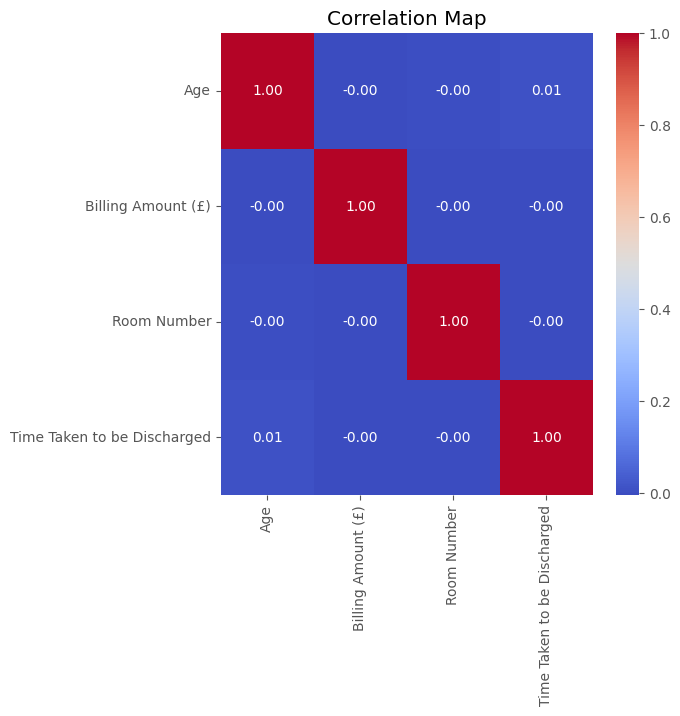

In [49]:
import seaborn as sns

correlation_matrix = df[['Age', 'Billing Amount (£)', 'Room Number', 
                         'Time Taken to be Discharged']].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Map')
plt.show()

All corellations between variables are 0 or close to 0, meaning there is no linear relationships between these variables.